<a href="https://colab.research.google.com/github/harinadh12/Freetime_NLP/blob/main/Handson_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Table of Contents:
1. Transformers & ecosystem
2. NLP applications & beyond
3. Hands-on example: Training and Deployment

Transformers in the Wild
1. Github Copilot - Model to generate code - integrated with vs code
2. Google Search - BERT Model and may be others
3. Protein Folding

                              "Attention is All You Need"

**Main Ingredients**
* Attention Mechanisms
* Self-Supervised Learning(pre training)
* Transfer Learning(Fine Tuning)

## Attention Mechansims
* Originally developed for recurrent neural networks
* Final state from encoder is decoded by decoder to re construct the orignal sequence in a new language -- This caused long sequences with lossy final state with not sufficient information about the initial tokens.
* Create a state at each step and assign weights to them for each decoder step so that while reconstructing, decoder can concentrate on a encoder step that best represents correct output token.
* Attention gives better modelling of word order.
* If you can model much of the sequence in decoder block with help of attention, we can completely go away from recurrence. --> That is what attention is all you need paper is about.
* Transformers scale much easier and they use self-attention.
* Self-Attention provides rich contextual representation.
* Word Embeddings are independent contextual representations.

## Three Types Of Architectures
* BERT
* T5
* GPT

Each Architecture excels in specific tasks\
NLU - seq classification, token classification --> BERT uses only encoder\
Predictive Typing - predict next few words - GPT - uses only decoder\
Translation Services - T5 - Encoder and Decoder


Pretrain -> Finetune
## Main Challenges
* Language barrier -- English dominant
* Black boxes -- why the model made certain predictions
* Data hungry -- Needs huge corpus data
* Biases -- data trained is large and bias exist in data as world is not perfect, so the model also has those biases imbibed in it.

### Bridging the science/ industry wide

1. HuggingFace  - democratize NLP model development, training using transformers library
2. Datasets - library
20,000 models on HuggingFace hub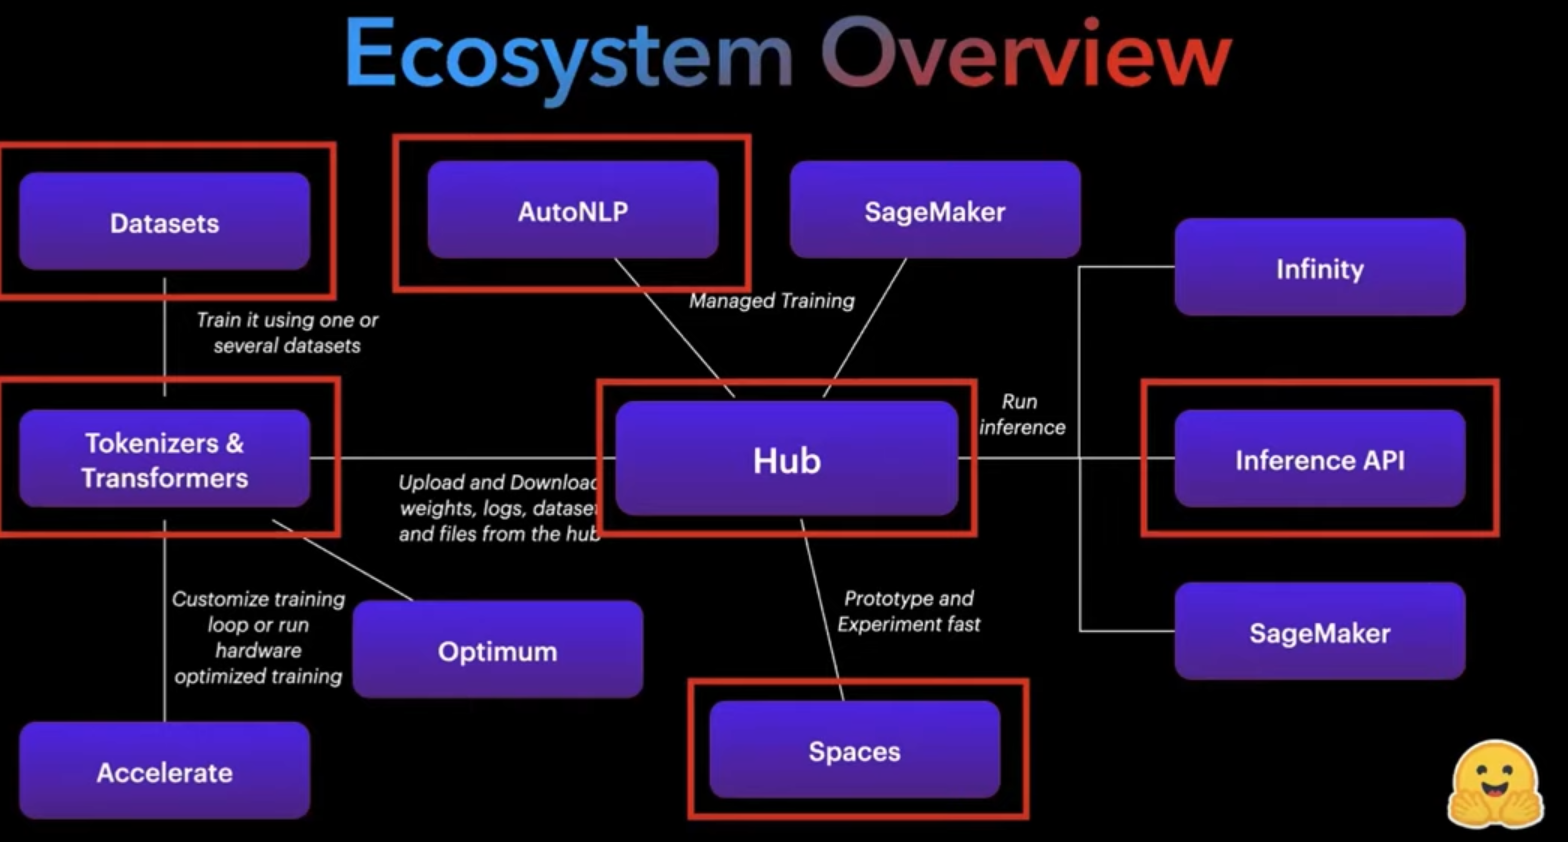


Hands-On HuggingFace Workshops

# Pipelines:
Pipeline is a highlevel API in huggingface ecosystem. It takes care of all preprocessing and returns cleaned up predictions. The pipeline is primarily used for inference where we apply fine-tuned models to new examples.

Tokenization --> Model --> Post processing

RawText --> tokens --> special tokens --> Input IDs

Pipeline
* AutoTokenizer
* AutoModel


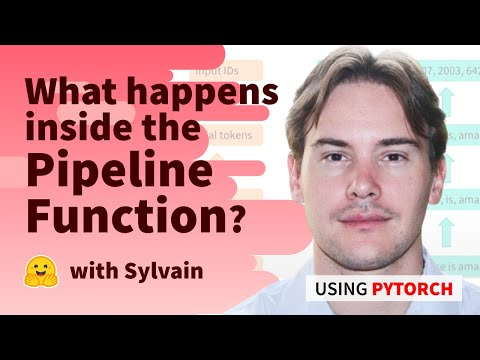

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('1pedAIvTWXk')

## Setup

In [ ]:
!pip install transformers
!pip install sentencepiece # tokenization library that converts text to tokens

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.6 MB/s 
     |████████████████████████████████| 6.6 MB 41.1 MB/s 
     |████████████████████████████████| 120 kB 46.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 5.1 MB/s 


Furthermore, we create a textwrapper to format long texts nicely.

In [ ]:
import textwrap
wrapper = textwrap.TextWrapper(width=80, break_long_words=False, break_on_hyphens=False)

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

print(wrapper.fill(text))

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.



One of the most common tasks in NLP and especially when dealing with customer texts is sentiment analysis. We would like to know if a customer is satisfied with a service or product and potentially aggregate the feedback across all customers for reporting.

For text classification the model gets all the inputs and makes a single prediction as shown in the following example:

We can achieve this by setting up a pipeline object which wraps a transformer model. When initializing we need to specify the task. Sentiment analysis is a subfield of text classification where a single label is given.


In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline('text-classification') # default model will be used -- in this case distilbert - uncased model is used

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sentiment_pipeline(text)

[{'label': 'NEGATIVE', 'score': 0.9015460014343262}]

The model predicts negative sentiment with a high confidence which makes sense. You can see that the pipeline returns a list of dicts with the predictions. We can also pass several texts at the same time in which case we would get several dicts in the list for each text one.


## Named entity recognition

Let's see if we can do something a little more sophisticated. Instead of just finding the overall sentiment let's see if we can extract named entities such as organizations, locations, or individuals from the text. This task is called named entity recognition (NER). Instead of predicting just a class for the whole text a class is predicted for each token, thus this task belongs to the category of token classification:

In [ ]:
ner_pipeline = pipeline('ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/998 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

When we pass our text through the model we get a long list of dicts: each dict corresponds to one detected entity. 

Since multiple tokens can correspond to a a single entity we can apply an aggregation strategy that merges entities if the same class appears in consequtive tokens.

In [ ]:
entities = ner_pipeline(text, aggregation_strategy="simple")
print(entities)

[{'entity_group': 'ORG', 'score': 0.8790107, 'word': 'Amazon', 'start': 5, 'end': 11}, {'entity_group': 'MISC', 'score': 0.9908588, 'word': 'Optimus Prime', 'start': 36, 'end': 49}, {'entity_group': 'LOC', 'score': 0.9997547, 'word': 'Germany', 'start': 90, 'end': 97}, {'entity_group': 'MISC', 'score': 0.5565707, 'word': 'Mega', 'start': 208, 'end': 212}, {'entity_group': 'PER', 'score': 0.59025556, 'word': '##tron', 'start': 212, 'end': 216}, {'entity_group': 'ORG', 'score': 0.6696923, 'word': 'Decept', 'start': 253, 'end': 259}, {'entity_group': 'MISC', 'score': 0.49834913, 'word': '##icons', 'start': 259, 'end': 264}, {'entity_group': 'MISC', 'score': 0.77536225, 'word': 'Megatron', 'start': 350, 'end': 358}, {'entity_group': 'MISC', 'score': 0.98785394, 'word': 'Optimus Prime', 'start': 367, 'end': 380}, {'entity_group': 'PER', 'score': 0.81209636, 'word': 'Bumblebee', 'start': 502, 'end': 511}]


In [ ]:
for entity in entities:
    print(f"{entity['word']}: {entity['entity_group']} ({entity['score']:.2f})")

Amazon: ORG (0.88)
Optimus Prime: MISC (0.99)
Germany: LOC (1.00)
Mega: MISC (0.56)
##tron: PER (0.59)
Decept: ORG (0.67)
##icons: MISC (0.50)
Megatron: MISC (0.78)
Optimus Prime: MISC (0.99)
Bumblebee: PER (0.81)


## Question Answering

Extractive Question Answering

Question --- Tokenization -- word piece tokens -- Encoder -- Dense Layer(linear) -- logits -- (token - begining of answer, end of answer)

We have now seen an example of text and token classification using transformers. However, there are more interesting tasks we can use transformers for. One of them is question-answering. In this task the model is given a question and a context and needs to find the answer to the question within the context. This problem can be rephrased into a classification problem: For each token the model needs to predict whether it is the start or the end of the answer. In the end we can extract the answer by looking at the span between the token with the highest start probability and highest end probability:

In [ ]:
qa_pipeline = pipeline("question-answering")

No model was supplied, defaulted to distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/473 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/261M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/213k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
question = "what does the customer want to exchange?"
qa_pipeline(question = question, context = text)

{'score': 0.14699383080005646, 'start': 350, 'end': 358, 'answer': 'Megatron'}

## Summarization

Let's see if we can go beyond these natural language understanding tasks (NLU) where BERT excels and delve into the generative domain. Note that generation is much more expensive since we usually generate one token at a time and need to run this several times.

A popular task involving generation is summarization.


In [ ]:
summarization_pipeline = pipeline("summarization") #sshleifer/distilbart-cnn-12-6 -- seq2seq , trained on cnn dataset i.e. news article

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
outputs = summarization_pipeline(text, max_length = 56, clean_up_tokenization_spaces=True)

In [ ]:
wrapper.fill(outputs[0]['summary_text'])

' Bumblebee ordered an Optimus Prime action figure from your online store in\nGermany. Unfortunately, when I opened the package, I discovered to my horror\nthat I had been sent an action figure of Megatron instead. As a lifelong enemy\nof the Decepticons, I'

Tricks to improve inference

* Quantization -- precision of operations use int instead of float
* ONNX run time -- optimizes model further -- also looks at hardware for further optmization.
* Infinity - takes model is optimized where creating one prediction takes like 1ms.

Metric to measure summarization instead of BLEU score


Other Tasks like translation are not coded here

Zero Shot Classification

# Custom Model

As a last example let's have a look at a cool application showing the versatility of transformers: zero-shot classification. In zero-shot classification the model receives a text and a list of candidate labels and determines which labels are compatible with the text. Instead of having fixed classes this allows for flexible classification without any labelled data! Usually this is a good first baseline!


In [ ]:
zero_shot_classifier = pipeline("zero-shot-classification",
                                model="vicgalle/xlm-roberta-large-xnli-anli")

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
text = 'Das NLP Meetup Zürich fand diese Woche nur virtuell statt.'
classes = ['Treffen', 'Arbeit', 'Digital', 'Reisen']

In [ ]:
zero_shot_classifier(text, classes, multi_label=True)

{'sequence': 'Das NLP Meetup Zürich fand diese Woche nur virtuell statt.',
 'labels': ['Digital', 'Treffen', 'Arbeit', 'Reisen'],
 'scores': [0.9988197088241577,
  0.9876959919929504,
  0.0026433279272168875,
  0.00045812802272848785]}



This seems to have worked really well on this short example. Naturally, for longer and more domain specific examples this approach might suffer.
More pipelines

There are many more pipelines that you can experiment with. Look at the following list for an overview:


In [ ]:
from transformers import pipelines
for task in pipelines.SUPPORTED_TASKS:
    print(task)



audio-classification
automatic-speech-recognition
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
conversational
image-classification
image-segmentation
image-to-text
object-detection


Transformers are applied to other domains as well  for e.g. computer vision


Table Question Answering is one such task


## Cache

Whenever we load a new model from the Hub it is cached on the machine you are running on. If you run these examples on Colab this is not an issue since the persistent storage will be cleaned after your session anyway. However, if you run this notebook on your laptop you might have just filled several GB of your hard drive. By default the cache is saved in the folder ~/.cache/huggingface/transformers. Make sure to clear it from time to time if your hard drive starts to fill up.

## Finetuning your first transformer

In this notebook we'll take a look at fine-tuning a multilingual Transformer model called XLM-RoBERTa for text classification.
By the end of this notebook you should know how to:

In this notebook we'll take a look at fine-tuning a multilingual Transformer model called XLM-RoBERTa for text classification. By the end of this notebook you should know how to:


    Load and process a dataset from the Hugging Face Hub
    Create a baseline with the zero-shot classification pipeline
    Fine-tune and evaluate pretrained model on your data
    Push a model to the Hugging Face Hub


In [ ]:
! pip install datasets transformers sentencepiece


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 365 kB 29.7 MB/s 
     |████████████████████████████████| 4.9 MB 61.9 MB/s 
     |████████████████████████████████| 1.3 MB 48.2 MB/s 
     |████████████████████████████████| 212 kB 65.5 MB/s 
     |████████████████████████████████| 120 kB 70.1 MB/s 
     |████████████████████████████████| 115 kB 68.5 MB/s 
     |████████████████████████████████| 127 kB 73.8 MB/s 
     |████████████████████████████████| 6.6 MB 58.3 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3




To be able to share your model with the community there are a few more steps to follow.

First you have to store your authentication token from the Hugging Face website (sign up here if you haven't already!) then execute the following cell and input your username and password:


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [ ]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


In this tutorial we'll use the Multilingual Amazon Reviews Corpus (or MARC for short). This is a large-scale collection of Amazon product reviews in several languages: English, Japanese, German, French, Spanish, and Chinese.

We can download the dataset from the Hugging Face Hub with the 🤗 Datasets library, but first let's take a look at the available subsets (also called configs):

In [ ]:
from datasets import get_dataset_config_names

In [ ]:
dataset_name = "amazon_reviews_multi"
langs = get_dataset_config_names(dataset_name)
langs

['all_languages', 'de', 'en', 'es', 'fr', 'ja', 'zh']

In [ ]:
from datasets import load_dataset

marc_de = load_dataset(path=dataset_name, name="de")
marc_de

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/200000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5000 [00:00<?, ? examples/s]

Dataset amazon_reviews_multi downloaded and prepared to /root/.cache/huggingface/datasets/amazon_reviews_multi/de/1.0.0/724e94f4b0c6c405ce7e476a6c5ef4f87db30799ad49f765094cf9770e0f7609. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 200000
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 5000
    })
})

One cool feature of 🤗 Datasets is that load_dataset() will cache the files at ~/.cache/huggingface/dataset/, so you won't need to re-download the dataset the next time your run the notebook. We can see that german_dataset is a DatasetDict object which is similar to a Python dictionary, with each key corresponding to a different split.

We can access one ot these splits just like an ordinary dictionary:


In [ ]:
train_ds = marc_de["train"]
train_ds

Dataset({
    features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
    num_rows: 200000
})

In [ ]:
train_ds[0]

{'review_id': 'de_0203609',
 'product_id': 'product_de_0865382',
 'reviewer_id': 'reviewer_de_0267719',
 'stars': 1,
 'review_body': 'Armband ist leider nach 1 Jahr kaputt gegangen',
 'review_title': 'Leider nach 1 Jahr kaputt',
 'language': 'de',
 'product_category': 'sports'}

In [ ]:
train_ds.column_names

['review_id',
 'product_id',
 'reviewer_id',
 'stars',
 'review_body',
 'review_title',
 'language',
 'product_category']

In [ ]:
train_ds.features

{'review_id': Value(dtype='string', id=None),
 'product_id': Value(dtype='string', id=None),
 'reviewer_id': Value(dtype='string', id=None),
 'stars': Value(dtype='int32', id=None),
 'review_body': Value(dtype='string', id=None),
 'review_title': Value(dtype='string', id=None),
 'language': Value(dtype='string', id=None),
 'product_category': Value(dtype='string', id=None)}


### Filtering for a product category

Although we could go ahead and fine-tune a Transformer model on the whole set of 200,000 German reviews, this will take several hours on a single GPU. So instead, we'll focus on fine-tuning a model for a single product category! In 🤗 Datasets, we can filter data very quickly by using the Dataset.filter() method. This method expects a function that returns Boolean values, in our case True if the product_category matches the chosen category and False otherwise. Here's one way to implement this, and we'll pick the sports category as the domain to train on:


In [ ]:
product_category = "sports"

def filter_for_product(example, product_category=product_category):
    return example["product_category"] == product_category

In [ ]:
product_dataset = marc_de.filter(filter_for_product)
product_dataset

  0%|          | 0/200 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/5 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 13748
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 339
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category'],
        num_rows: 329
    })
})

Yep, this looks good - we have 13,748 reviews in the train split which agrees the number we saw in the distribution of categories earlier. Let's do a quick sanity check by taking a look at a few samples. Here 🤗 Datasets provides Dataset.shuffle() and Dataset.select() functions that we can chain to get a random sample:

In [ ]:
product_dataset["train"].shuffle(seed=42).select(range(3))[:]

{'review_id': ['de_0592068', 'de_0659764', 'de_0617399'],
 'product_id': ['product_de_0646545',
  'product_de_0628607',
  'product_de_0596523'],
 'reviewer_id': ['reviewer_de_0065351',
  'reviewer_de_0938057',
  'reviewer_de_0996678'],
 'stars': [5, 2, 3],
 'review_body': ['Dieses aufblasbare Sofa ist sehr einfach aufzubauen (einfach in Wind halten) und leicht wieder einzupacken. Es war gut verpackt (eine Tasche mit Tragegurt war dabei), hat Aufbewahrungsmöglichkeiten an der Rechten Seite und einen Hering zum Befestigen am oberen Rand. Es ist sehr bequem und die Preis/Leistung ist einfach super! Ich kann es wirklich nur empfehlen :)',
  'Leider nach ca. 1 Jahr ist die Schnalle abgerissen. Schade!!!',
  'An sich ist das X-Bike nicht schlecht bis auf die Verarbeitung vom Computer. Sehr zu bemängeln habe ich aber die Pedalen bzw. Die Kugellager darin, am zweiten Tag und nach circa 30 km haben sich die Kugellager aufgelöst. Pedale lassen dich nicht mehr drehen.'],
 'review_title': ['Sehr b



Okay, now that we have our corpus of sports reviews, let's do one last bit of data preparation: creating label mappings from star ratings to human readable strings.


In [ ]:
label_names = ["terrible", "poor", "ok", "good", "great"]
id2label = {idx:label for idx, label in enumerate(label_names)}
id2label

{0: 'terrible', 1: 'poor', 2: 'ok', 3: 'good', 4: 'great'}

In [ ]:
def map_labels(example):
    # Shift labels to start from 0
    label_id = example["stars"] - 1
    return {"labels": label_id, "label_name": id2label[label_id]}

To apply this mapping, we simply feed it to Dataset.map as follows:

In [ ]:
product_dataset = product_dataset.map(map_labels)

  0%|          | 0/13748 [00:00<?, ?ex/s]

  0%|          | 0/339 [00:00<?, ?ex/s]

  0%|          | 0/329 [00:00<?, ?ex/s]

In [ ]:


label2id = {v:k for k,v in id2label.items()}




Creating a baseline

A good practice when you're doing any sort of machine learning is to create a baseline model you can compare against. For text classification problems, a quick way to start is by using the zero-shot classification pipeline, which allows you to easily customise the number classes without having to train a model from scratch. If you want some more informatoin about the pipelines in Transformers, check out the following video:


In [ ]:
from transformers import pipeline 

# device >= 0 places the model on the GPU
# Set device=-1 to run CPU if your GPU is not beefy enough
zeroshot_classifier = pipeline("zero-shot-classification", model="vicgalle/xlm-roberta-large-xnli-anli", device=0)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 0 files to the new cache system


0it [00:00, ?it/s]

Downloading:   0%|          | 0.00/734 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

In [ ]:
zeroshot_classifier("Dieser Tennisschläger ist perfekt!", candidate_labels=label_names)

{'sequence': 'Dieser Tennisschläger ist perfekt!',
 'labels': ['great', 'good', 'ok', 'poor', 'terrible'],
 'scores': [0.41970714926719666,
  0.380079984664917,
  0.19984760880470276,
  0.0001888187980512157,
  0.00017650844529271126]}

In [ ]:
def compute_zeroshot_preds(examples):
    preds = zeroshot_classifier(examples["review_body"], candidate_labels=label_names)
    label_pred = label2id[preds["labels"][0]]
    return {"zeroshot_prediction": label_pred}

In [ ]:
zeroshot_preds = product_dataset["validation"].map(compute_zeroshot_preds)

  0%|          | 0/339 [00:00<?, ?ex/s]

/usr/local/lib/python3.7/dist-packages/transformers/pipelines/base.py:1046: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,




Now that we've got some predictions, it's time to evaluate them! In the MARC paper, the authors point out that one should use the mean absolute error (MAE) for star ratings because:

    star ratings for each review are ordinal, and a 2-star prediction for a 5-star review should be penalized more heavily than a 4-star prediction for a 5-star review.

We'll take the same approach here and we can get the metric easily from Scikit-learn as follows:


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(zeroshot_preds["labels"], zeroshot_preds["zeroshot_prediction"])

0.9351032448377581



For reference, the MARC paper quotes MAE results from mBERT in the range of 0.5-0.7. Let's see if we can get close to that with XLM-RoBERTa!
From text to tokens

Like other machine learning models, Transformers expect their inputs in the form of numbers (not strings) and so some form of preprocessing is required. For NLP, this preprocessing step is called tokenization. Tokenization converts strings into atomic chunks called tokens, and these tokens are subsequently encoded as numerical vectors.

In [ ]:
from transformers import AutoTokenizer

model_checkpoint = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [ ]:
def tokenize_reviews(examples):
    return tokenizer(examples["review_body"], truncation=True, max_length=180)

In [ ]:
tokenized_dataset = product_dataset.map(tokenize_reviews, batched=True)
tokenized_dataset

  0%|          | 0/14 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

DatasetDict({
    train: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', 'label_name', 'input_ids', 'attention_mask'],
        num_rows: 13748
    })
    validation: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', 'label_name', 'input_ids', 'attention_mask'],
        num_rows: 339
    })
    test: Dataset({
        features: ['review_id', 'product_id', 'reviewer_id', 'stars', 'review_body', 'review_title', 'language', 'product_category', 'labels', 'label_name', 'input_ids', 'attention_mask'],
        num_rows: 329
    })
})

## Loading a pretrained model

To load a pretrained model from the Hub is quite simple: just select the appropriate AutoModelForXxx class and use the from_pretrained() function with the model checkpoint. In our case, we're dealing with 5 classes (one for each star) so to initialise the model we'll provide this information along with the label mappings:


In [ ]:
from transformers import AutoModelForSequenceClassification

num_labels = 5
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels, label2id=label2id, id2label=id2label)

Downloading:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of the model checkpoint at xlm-roberta-base were not used when initializing XLMRobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.decoder.weight', 'lm_head.bias', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.out_p

## Creating a Trainer



To create a Trainer, we usually need a few basic ingredients:

    A TrainingArguments class to define all the hyperparameters
    A compute_metrics function to compute metrics during evaluation
    Datasets to train and evaluate on



In [ ]:
from transformers import TrainingArguments

model_name = model_checkpoint.split("/")[-1]
batch_size = 16
num_train_epochs = 2
logging_steps = len(tokenized_dataset["train"]) // (batch_size * num_train_epochs)

args = TrainingArguments(
    output_dir=f"{model_name}-finetuned-marc",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    weight_decay=0.01,
    logging_steps=logging_steps,
    push_to_hub=True,
)  

In [ ]:


import numpy as np

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {"MAE": mean_absolute_error(labels, predictions)}



In [ ]:


from transformers import Trainer 

trainer = Trainer(
    model,
    args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)



Cloning https://huggingface.co/Harinadh/xlm-roberta-base-finetuned-marc into local empty directory.


In [ ]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: language, reviewer_id, review_title, product_category, review_body, label_name, review_id, stars, product_id. If language, reviewer_id, review_title, product_category, review_body, label_name, review_id, stars, product_id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 13748
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 

Epoch,Training Loss,Validation Loss,Mae
1,1.039800,1.004949,0.510324


The following columns in the evaluation set don't have a corresponding argument in `XLMRobertaForSequenceClassification.forward` and have been ignored: language, reviewer_id, review_title, product_category, review_body, label_name, review_id, stars, product_id. If language, reviewer_id, review_title, product_category, review_body, label_name, review_id, stars, product_id are not expected by `XLMRobertaForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 339
  Batch size = 16
Saving model checkpoint to xlm-roberta-base-finetuned-marc/checkpoint-860
Configuration saved in xlm-roberta-base-finetuned-marc/checkpoint-860/config.json
Model weights saved in xlm-roberta-base-finetuned-marc/checkpoint-860/pytorch_model.bin
tokenizer config file saved in xlm-roberta-base-finetuned-marc/checkpoint-860/tokenizer_config.json
Special tokens file saved in xlm-roberta-base-finetuned-marc/checkpoint-860/special_tokens_map.json
tokenize

In [ ]:
def evaluate_model(lang):
  # Load the language subset
    dataset = load_dataset(dataset_name, lang, split="validation")
    # Filter for the `sports` product category
    product_dataset = dataset.filter(filter_for_product)
    # Map and create label columns
    product_dataset = product_dataset.map(map_labels)
    # Tokenize the inputs
    tokenized_dataset = product_dataset.map(tokenize_reviews, batched=True)
    # Generate predictions and metrics
    preds = trainer.evaluate(eval_dataset=tokenized_dataset)
    return {"MAE": preds["eval_MAE"]}

## Using your fine-tuned model

In [ ]:
from transformers import pipeline 

finetuned_checkpoint = "lewtun/xlm-roberta-base-finetuned-marc"
classifier = pipeline("text-classification", model=finetuned_checkpoint)

In [ ]:
classifier("I love these running shoes!")